### Построение архитектуры нейронной сети для задач бинарной классификации

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot
%matplotlib inline

from sklearn.model_selection import StratifiedKFold

In [2]:
# Загрузка данных
path = 'https://raw.githubusercontent.com/jbrownlee/datasets/master/banknote_authentication.csv'
df = pd.read_csv(path, header = None)
df.head()
# variance
# skewness
# curtosis
# entropy
# class - целевая колонка

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Описательная статистика
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
# Проверяем корреляцию
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [5]:
# Общая информация по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# Распределение данных (большое кол-во уникальных значений т.к. данные нормализованны)
df[0].value_counts()

 0.5706    5
 0.5195    4
 0.3292    4
 0.3798    4
-2.6479    3
          ..
 0.1848    1
 4.5707    1
 2.9742    1
 1.1472    1
-2.5419    1
Name: 0, Length: 1338, dtype: int64

In [7]:
# Датасет сбалансирован
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [8]:
# Разбиваем датасет на фичи и целевое значение
X, y = df.values[:, :-1], df.values[:, -1]
# Приводим X к типу float32
X = X.astype('float32')

In [9]:
X[1]

array([ 4.5459,  8.1674, -2.4586, -1.4621], dtype=float32)

In [10]:
y[1]

0.0

In [11]:
# Создаем LabelEncoder
y = LabelEncoder().fit_transform(y)

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [13]:
# Создаем тестовую и обучающую выборки (и перемешиваем датасет)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [14]:
# Проверка размерностей после разбиения
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


### Создаем нейронную сеть

In [15]:
n_features = X.shape[1] # Размерность X
# Создаем модель
model = Sequential()

model.add(Dense(20, activation = 'relu', input_shape = (n_features, )))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
# Компилируем модель
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [17]:
# Обучение модели
# bacth_size - размер данных, которые мы подаем для обучения
# verbose - позволяет визуализировать процесс обучения
history = model.fit(X_train, y_train,
                    epochs = 20, batch_size = 32,
                    verbose = 1, validation_data = (X_test, y_test))

Epoch 1/20
33/33 [==============================] - 1s 5ms/step - loss: 0.4891 - val_loss: 0.3557
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2983 - val_loss: 0.2376
Epoch 3/20
33/33 [==============================] - 0s 1ms/step - loss: 0.2128 - val_loss: 0.1683
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1553 - val_loss: 0.1219
Epoch 5/20
33/33 [==============================] - 0s 1ms/step - loss: 0.1157 - val_loss: 0.0896
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0872 - val_loss: 0.0660
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0671 - val_loss: 0.0505
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0398
Epoch 9/20
33/33 [==============================] - 0s 1ms/step - loss: 0.0428 - val_loss: 0.0314
Epoch 10/20
33/33 [==============================] - 0s 1ms/step - loss: 0.0348 - val_loss: 0.0251
Epoch 11/20
33/33 [

In [18]:
# Визуализация процесса обучения
yhat = model.predict(X_test)

# model.predict_classes() is deprecated and will be removed after 2021-01-01.
# Please use instead:

# np.argmax(model.predict(x), axis=-1),
# if your model does multi-class classification
# (e.g. if it uses a softmax last-layer activation).

# (model.predict(x) > 0.5).astype("int32"),
# if your model does binary classification
# (e.g. if it uses a sigmoid last-layer activation).

yhat_classes = (model.predict(X_test) > 0.5).astype("int32")

# Валидация прогноза
score = accuracy_score(y_test, yhat_classes)
print(f'Accuracy: {score}')

11/11 [==============================] - 0s 698us/step
Accuracy: 1.0


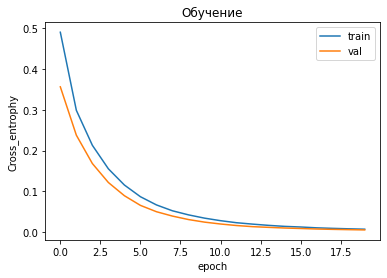

In [19]:
pyplot.title('Обучение')
pyplot.xlabel('epoch')
pyplot.ylabel('Cross_entrophy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.5605 - val_loss: 0.3984
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 0.2790
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2137 - val_loss: 0.2109
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1612
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1100 - val_loss: 0.1286
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0813 - val_loss: 0.1006
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0616 - val_loss: 0.0817
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0477 - val_loss: 0.0639
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0497
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0388
Epoch 11/20
39/39 [

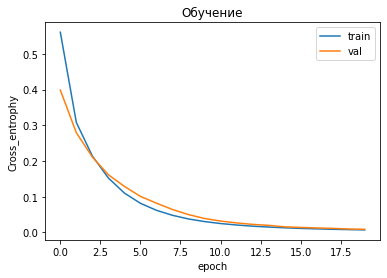

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.8703 - val_loss: 0.6470
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.5425 - val_loss: 0.3979
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 0.2697
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2608 - val_loss: 0.1782
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1766 - val_loss: 0.1094
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1119 - val_loss: 0.0700
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0783 - val_loss: 0.0495
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0578 - val_loss: 0.0370
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0283
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0355 - val_loss: 0.0225
Epoch

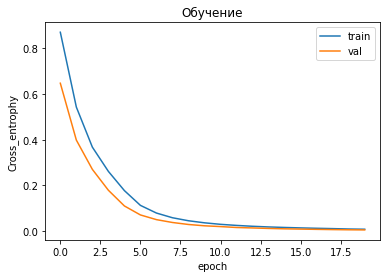

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.7199 - val_loss: 0.5926
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.5024 - val_loss: 0.4491
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3464 - val_loss: 0.3111
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2098 - val_loss: 0.2099
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1242 - val_loss: 0.1431
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0790 - val_loss: 0.1037
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0545 - val_loss: 0.0813
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0404 - val_loss: 0.0645
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.0524
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0438
Epoch

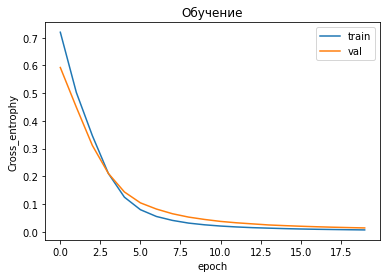

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5469 - val_loss: 0.4044
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3464 - val_loss: 0.2632
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2280 - val_loss: 0.1692
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1412 - val_loss: 0.0997
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0894 - val_loss: 0.0666
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0640 - val_loss: 0.0491
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0484 - val_loss: 0.0371
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0383 - val_loss: 0.0288
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0310 - val_loss: 0.0232
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0188
Epoch

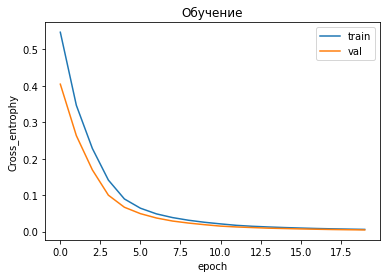

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 1.5409 - val_loss: 1.0529
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.8133 - val_loss: 0.6253
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.5143 - val_loss: 0.4300
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3607 - val_loss: 0.3179
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2481 - val_loss: 0.2182
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1565 - val_loss: 0.1519
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1061 - val_loss: 0.1152
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0773 - val_loss: 0.0923
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0593 - val_loss: 0.0760
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0472 - val_loss: 0.0656
Epoch

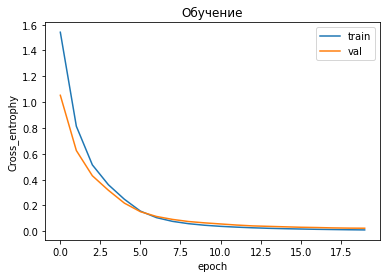

Accuracy: 0.9927007299270073
Epoch 1/20
39/39 [==============================] - 1s 7ms/step - loss: 0.7349 - val_loss: 0.4929
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3896 - val_loss: 0.3314
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2712 - val_loss: 0.2440
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1948 - val_loss: 0.1791
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1347 - val_loss: 0.1260
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0928 - val_loss: 0.0927
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0671 - val_loss: 0.0709
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0509 - val_loss: 0.0579
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0393 - val_loss: 0.0441
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0304 - val_los

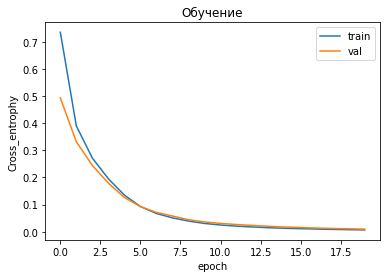

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5392 - val_loss: 0.3906
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3370 - val_loss: 0.2048
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1902 - val_loss: 0.1006
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1099 - val_loss: 0.0565
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0734 - val_loss: 0.0383
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0538 - val_loss: 0.0264
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0410 - val_loss: 0.0192
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0327 - val_loss: 0.0153
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0267 - val_loss: 0.0116
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0219 - val_loss: 0.0094
Epoch

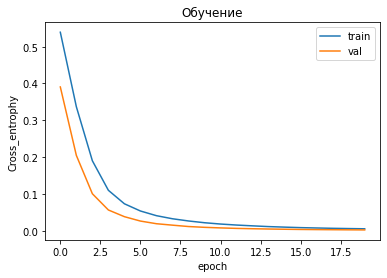

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.5645 - val_loss: 0.3316
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2760 - val_loss: 0.1781
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1722 - val_loss: 0.1044
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1171 - val_loss: 0.0651
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0837 - val_loss: 0.0431
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0619 - val_loss: 0.0306
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0485 - val_loss: 0.0228
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0395 - val_loss: 0.0176
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0140
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0110
Epoch

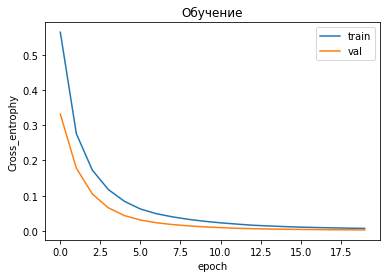

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4766 - val_loss: 0.3574
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2865 - val_loss: 0.2170
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1907 - val_loss: 0.1335
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1287 - val_loss: 0.0873
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0893 - val_loss: 0.0578
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0625 - val_loss: 0.0394
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0276
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0330 - val_loss: 0.0204
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0168
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0127
Epoch

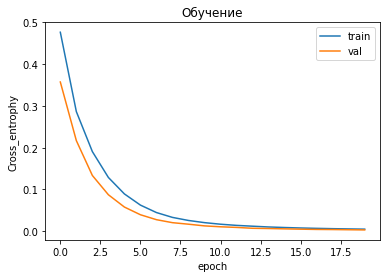

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 1.0567 - val_loss: 0.5167
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3594 - val_loss: 0.3074
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2240 - val_loss: 0.2090
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1518 - val_loss: 0.1538
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1143 - val_loss: 0.1226
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0893 - val_loss: 0.0989
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0711 - val_loss: 0.0808
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0573 - val_loss: 0.0678
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0469 - val_loss: 0.0563
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0479
Epoch

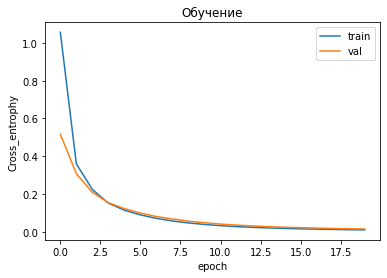

Accuracy: 1.0


In [20]:
# Выполним кросс-валидация (ранее был тест по отложенной выборке)
n_features = X.shape[1] # Размерность X
kfold = StratifiedKFold(10)
scores = []

for train_ix, test_ix in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # Создаем модель
    model = Sequential()
    model.add(Dense(20, activation = 'relu', input_shape = (n_features, )))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    history = model.fit(X_train, y_train,
                    epochs = 20, batch_size = 32,
                    verbose = 1, validation_data = (X_test, y_test))
    yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
    pyplot.title('Обучение')
    pyplot.xlabel('epoch')
    pyplot.ylabel('Cross_entrophy')
    pyplot.plot(history.history['loss'], label = 'train')
    pyplot.plot(history.history['val_loss'], label = 'val')
    pyplot.legend()
    pyplot.show()
    # Валидация прогноза
    score = accuracy_score(y_test, yhat_classes)
    print(f'Accuracy: {score}')
    scores.append(score)    

In [21]:
print(f'Средняя точность при кроссвалидации: {np.mean(scores)}')

Средняя точность при кроссвалидации: 0.9992700729927007
